# 一、基本信息

1. 实验名称：泰坦尼克号乘客数据预处理
2. 实验学时：2
3. 实验类别：综合性
4. 课程名称：数据分析基础（Python）
5. 课程编号：12002CC019


# 二、实验目的（预期学习效果）


本实验应符合课程总体学习要求，促进以下预期效果的达成：
* 掌握数据载入、数据清洗、数据标准化、数据转换等知识；
* 能够综合应用数据载入、数据清洗、数据标准化、数据转换等知识对数据进行预处理。

涉及主要KT点包括：
* KT19	Pandas数据载入
* KT21	Pandas数据清洗
* KT22	Pandas数据标准化
* KT23	Pandas数据转换


# 三、实验任务及原理

实验任务说明：在20世纪初，由英国白星轮船公司耗资7500万英镑打造的当时世界上最大的豪华客轮“泰坦尼克”号，曾被称作为“永不沉没的船”和“梦幻之船”这艘豪轮在她的处女之航中，就因撞上冰山而在大西洋沉没。百年来，关于“泰坦尼克”号沉没的原因，一直是人们津津乐道的话题。据了解，当时泰坦尼克号上共有乘客 2224 人，本实验提供的数据集为部分样本，共有 891条数据。数据文件名称为：Titanic.csv。

由于历史原因，数据并不完整，有些数据项缺失严重，因此在进行分析统计之前，需要对数据进行预处理。  
本实验要求：  
（1）观察和处理重复值；  
（2）观察和处理缺失值；  
（3）观察和处理异常值；  
（4）对某些数据进行离散化处理；  
（5）某些文本型数据转换为数值型数据;某些类别型数据转换为哑变量；    
（6）某些数据进行标准化处理。    

本实验主要应用数据预处理知识完成，具体包括：  
（1）Pandas数据清洗  
* 检测与处理缺失值。利用isnull()函数可以直接判断某列中的哪个数据为NaN；利用isnull().sum()可以统计缺失值的缺失数目；利用info()函数查看DataFrame的缺失值。可以采用删除法、填充法、插值法处理缺失值。
* 检测与处理重复值。  在DataFrame中利用duplicates方法判断各行是否有重复数据。数据中存在重复样本时，只需保留一份即可，其余的可以做删除处理。
* 检测与处理异常值。异常值是指数据中存在个别数值明显偏离其余数据的值。数据统计方法中常用散点图、箱线图和3σ法则检测异常值。  

（2）Pandas数据标准化  
* 离差标准化。离差标准化是对原始数据所做的一种线性变换，将原始数据的数值映射到[0,1]区间。  
* 标准差标准化。又称零均值标准化或z分数标准化，是当前使用最广泛的数据标准化方法。


（3）Pandas数据转换  
* 类别型数据的哑变量处理。哑变量( Dummy Variables)是用以反映质的属性的一个人工变量，是量化了的自变量，通常取值为0或1。Pandas提供了get_dummies函数。
* 连续型变量的离散化。可以采用等宽法或者等频法对数据进行离散化处理，Pandas提供了cut函数。



# 四、实验环境

实验仪器设备：计算机。

实验软件：Jupyter Notebook。

工具耗材：无。

# 五、实验预习任务

实验前，应复习本实验涉及的KT点，并完成前次布置的相关练习题目，并阅读相关参考性资料，做好实验前准备。

# 六、实验过程（实验方案）


## **任务1** 数据载入
将数据集进行载入，以进行后续处理。

问题1. 引入包，读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读文件'data/Titanic.csv'
titanic_df = pd.read_csv('data/Titanic.csv')


## **任务2** 重复值处理
对数据集当中的重复值进行处理。

问题2. 观察有无重复数据，如果有，进行处理

In [2]:
titanic_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

## **任务3** 缺失值处理
对数据集当中的缺失值进行处理。

问题3. 分别调用isnull和info方法查看数据各字段信息，观察数据的缺失情况，请写下分析结果

In [3]:
# 查看数据缺失情况
print(titanic_df.isnull().sum())
print(titanic_df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

分析：结合题目要求，应该对数据做哪些处理呢？

问题4. 删除“PassengerId”,“Name”,“Ticket”等分析中不用的数据；Cabin丢失值太多，不能用此数据分析出 Cabin 对生存率的影响,删除

In [4]:
# 删掉“PassengerId”,“Name”,“Ticket”等用处不大的数据
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)

#Cabin丢失值太多，不能用此数据分析出 Cabin 对生存率的影响,删除
titanic_df.drop("Cabin",axis=1,inplace=True)

#查看数据表基本信息，确认以上处理是否成功
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


问题5. Embarked有缺失值，用众数填充

In [5]:
# Embarked 有两个丢失值，用众数填充
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode())
#查看数据表基本信息，确认以上处理是否成功
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


问题6. Age 的丢失值较多，填充的年龄为年龄平均值的上下一个标准差范围内的随机数

In [6]:
# 计算Age的平均值、标准差，统计为空的Age个数
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# 求年龄随机数，范围在 (mean - std， mean + std)
rand_age = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

# 屏蔽“mode.chained_assignment”警告
pd.set_option('mode.chained_assignment', None)
# 将随机数填充进 Age 的缺失值中
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_age

#查看数据表基本信息，确认填充是否成功
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## **任务4** 异常值处理
对数据集当中的异常值进行处理。

问题7. 分别利用检查散点图法、箱线图法和3σ法则检查 Age 是否存在异常值

<AxesSubplot:xlabel='Age', ylabel='Age'>

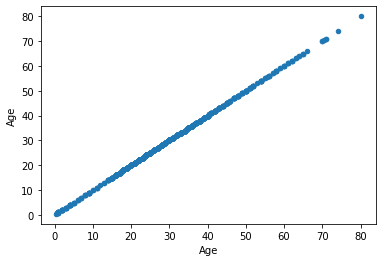

In [7]:
# 利用散点图检查 Age 是否存在异常值
titanic_df[['Age']].plot(kind = 'scatter',x = 0, y = 'Age')

<AxesSubplot:>

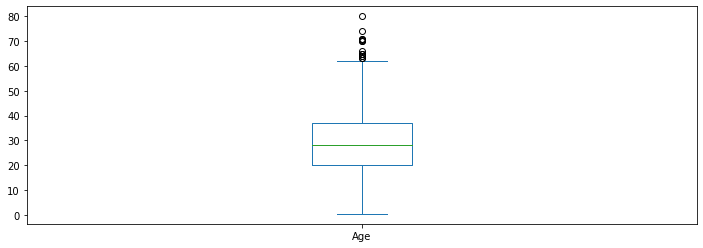

In [8]:
# 利用箱图检查 Age 是否存在异常值
titanic_df['Age'].plot(kind = 'box',figsize = (12,4)) 

In [9]:
# 利用3σ法则检查 Age 是否存在异常值
# 定义函数outRange，接收一个序列S，利用3σ法则检测S的异常值，返回异常值索引列表
def outRange(S):
    blidx = (S.mean() - 3* S.std() > S)|( S.mean() + 3*S.std() < S)
    idx = np.arange(S.shape[0])[blidx]
    return idx

#调用函数outRange，检测 Age是否有异常值，如果有输出
outier_age = outRange(titanic_df['Age'])
display(outier_age)
out_age = titanic_df.iloc[outier_age]
display(out_age)


array([ 96, 116, 493, 630, 851])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [10]:
#综合以上观察，对异常值进行处理，可以进行异常值填充，也可以删除异常值所在记录
titanic_df = titanic_df.drop(outier_age)

#调用函数outRange， 再次检查 Age是否有异常值
outier_age = outRange(titanic_df['Age'])
out_age = titanic_df.iloc[outier_age]
display(out_age)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
672,0,2,male,70.0,0,0,10.5,S
745,0,1,male,70.0,1,1,71.0,S


## **任务5** 数据转换
将数据从一种形式转换为另一种形式。 

问题8. 利用等宽法划分4个不同年龄段群体，年龄区间分别为："小于12岁","13-17岁","18-64岁","大于65岁" ，增加一个列“Age_group”保存年龄区间，显示每个区间人数以及数据表

In [11]:
bins = [0, 12, 18, 65, 100]
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], bins)
#显示每个区间人数以及数据表
display(titanic_df['Age_group'].value_counts())
display(titanic_df)

(18, 65]     710
(12, 18]     104
(0, 12]       69
(65, 100]      3
Name: Age_group, dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,male,22.0,1,0,7.2500,S,"(18, 65]"
1,1,1,female,38.0,1,0,71.2833,C,"(18, 65]"
2,1,3,female,26.0,0,0,7.9250,S,"(18, 65]"
3,1,1,female,35.0,1,0,53.1000,S,"(18, 65]"
4,0,3,male,35.0,0,0,8.0500,S,"(18, 65]"
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,"(18, 65]"
887,1,1,female,19.0,0,0,30.0000,S,"(18, 65]"
888,0,3,female,15.0,1,2,23.4500,S,"(12, 18]"
889,1,1,male,26.0,0,0,30.0000,C,"(18, 65]"


问题9. 基于Age，利用等频法将数据划分为4个区间，增加一个列“Age_group_q”保存年龄区间,显示每个区间人数以及数据表

In [12]:
titanic_df['Age_group_q'] = pd.qcut(titanic_df['Age'],4)

display(titanic_df['Age_group_q'].value_counts())
display(titanic_df)

(20.0, 28.0]     228
(0.419, 20.0]    224
(28.0, 37.0]     218
(37.0, 70.0]     216
Name: Age_group_q, dtype: int64

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,Age_group_q
0,0,3,male,22.0,1,0,7.2500,S,"(18, 65]","(20.0, 28.0]"
1,1,1,female,38.0,1,0,71.2833,C,"(18, 65]","(37.0, 70.0]"
2,1,3,female,26.0,0,0,7.9250,S,"(18, 65]","(20.0, 28.0]"
3,1,1,female,35.0,1,0,53.1000,S,"(18, 65]","(28.0, 37.0]"
4,0,3,male,35.0,0,0,8.0500,S,"(18, 65]","(28.0, 37.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,"(18, 65]","(20.0, 28.0]"
887,1,1,female,19.0,0,0,30.0000,S,"(18, 65]","(0.419, 20.0]"
888,0,3,female,15.0,1,2,23.4500,S,"(12, 18]","(0.419, 20.0]"
889,1,1,male,26.0,0,0,30.0000,C,"(18, 65]","(20.0, 28.0]"


问题10. 将 Sex由文本型数据转换为数值型数据，female转换为0,male转换为1

In [13]:
titanic_df = titanic_df.replace({'female':0,'male':1})
display(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group,Age_group_q
0,0,3,1,22.0,1,0,7.2500,S,"(18, 65]","(20.0, 28.0]"
1,1,1,0,38.0,1,0,71.2833,C,"(18, 65]","(37.0, 70.0]"
2,1,3,0,26.0,0,0,7.9250,S,"(18, 65]","(20.0, 28.0]"
3,1,1,0,35.0,1,0,53.1000,S,"(18, 65]","(28.0, 37.0]"
4,0,3,1,35.0,0,0,8.0500,S,"(18, 65]","(28.0, 37.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,"(18, 65]","(20.0, 28.0]"
887,1,1,0,19.0,0,0,30.0000,S,"(18, 65]","(0.419, 20.0]"
888,0,3,0,15.0,1,2,23.4500,S,"(12, 18]","(0.419, 20.0]"
889,1,1,1,26.0,0,0,30.0000,C,"(18, 65]","(20.0, 28.0]"


问题11. 将 Embarked转换为哑变量

In [14]:
titanic_df = pd.get_dummies(titanic_df,columns = ['Embarked'])
display(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_group,Age_group_q,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,"(18, 65]","(20.0, 28.0]",0,0,1
1,1,1,0,38.0,1,0,71.2833,"(18, 65]","(37.0, 70.0]",1,0,0
2,1,3,0,26.0,0,0,7.9250,"(18, 65]","(20.0, 28.0]",0,0,1
3,1,1,0,35.0,1,0,53.1000,"(18, 65]","(28.0, 37.0]",0,0,1
4,0,3,1,35.0,0,0,8.0500,"(18, 65]","(28.0, 37.0]",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,"(18, 65]","(20.0, 28.0]",0,0,1
887,1,1,0,19.0,0,0,30.0000,"(18, 65]","(0.419, 20.0]",0,0,1
888,0,3,0,15.0,1,2,23.4500,"(12, 18]","(0.419, 20.0]",0,0,1
889,1,1,1,26.0,0,0,30.0000,"(18, 65]","(20.0, 28.0]",1,0,0


问题12. 将 Fare采用标准差方法进行标准化

In [15]:
# 定义函数StandardScale，接收Series类型数据data，按照标准差标准化公式进行转换，返回转换后的data
def StandardScale(data):
    data = (data - data.mean()) / data.std()
    return data

titanic_df['Fare'] = StandardScale(titanic_df['Fare'])

# 输出Fare数据的均值和方差,输出数据表
print("Fare的均值为 {}，方差为 {}".format(titanic_df['Fare'].mean(),titanic_df['Fare'].std()))
display(titanic_df)

Fare的均值为 7.150663307024216e-16，方差为 0.9999999999999994


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Age_group,Age_group_q,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,-0.501632,"(18, 65]","(20.0, 28.0]",0,0,1
1,1,1,0,38.0,1,0,0.783750,"(18, 65]","(37.0, 70.0]",1,0,0
2,1,3,0,26.0,0,0,-0.488083,"(18, 65]","(20.0, 28.0]",0,0,1
3,1,1,0,35.0,1,0,0.418745,"(18, 65]","(28.0, 37.0]",0,0,1
4,0,3,1,35.0,0,0,-0.485573,"(18, 65]","(28.0, 37.0]",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,-0.386209,"(18, 65]","(20.0, 28.0]",0,0,1
887,1,1,0,19.0,0,0,-0.044957,"(18, 65]","(0.419, 20.0]",0,0,1
888,0,3,0,15.0,1,2,-0.176439,"(12, 18]","(0.419, 20.0]",0,0,1
889,1,1,1,26.0,0,0,-0.044957,"(18, 65]","(20.0, 28.0]",1,0,0


# 七、实验课后任务

学生应当完成本次实验涉及相关任务，完成本次Jupyter Notebook实验报告以后，应将本实验报告文件（.ipynb）按照授课教师指定方式进行上传。


# 八、实验考核

实验满分100分，共5项任务，12个问题，问题1-问题11每个8分，问题12分数12分。按照学生完成问题的程度、代码运行结果、分析结果等质量标准酌情给出对应分数。

# 九、实验资源
本实验提供实验用数据文件： 
* Titanic.csv
